In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dpi = 300
plt.gcf().set_dpi(dpi)


# pd load bench-results.db
# Given a table name and a SQLAlchemy connectable, returns a DataFrame
bench_results_df = pd.read_sql_table('bench_results', 'sqlite:///../bench-results-server.db')
bench_results_df


,id,dataset,method,tool,average_time,iteration_count,timestamp,multiprocessing,n_workers
0,1,er_500,betweenness_centrality,eg,0.546072,1,2022-10-31 07:17:55.974163,False,1
1,2,er_500,betweenness_centrality,eg,0.295851,1,2022-10-31 07:17:55.974163,True,2
2,3,er_500,betweenness_centrality,eg,0.174771,2,2022-10-31 07:17:55.974163,True,4
3,4,er_500,closeness_centrality,eg,0.148740,2,2022-10-31 07:17:55.974163,False,1
4,5,er_500,closeness_centrality,eg,0.090372,5,2022-10-31 07:17:55.974163,True,2
...,...,...,...,...,...,...,...,...,...
466,479,er_paper_20221221_100000_200000_multiprocessing,constraint,easygraph,24.048153,1,2023-01-10 19:21:26.131081,True,2
467,480,er_paper_20221221_100000_200000_multiprocessing,constraint,easygraph,15.337136,1,2023-01-10 19:21:26.132890,True,4
468,481,er_paper_20221221_100000_200000_multiprocessing,hierarchy,easygraph,22.240319,1,2023-01-10 19:21:26.134913,False,1
469,482,er_paper_20221221_100000_200000_multiprocessing,hierarchy,easygraph,23.338508,1,2023-01-10 19:21:26.136505,True,2


In [2]:
# multiprocessing df
# use row with id in 1 to 96
df = bench_results_df[bench_results_df['id'] <= 96]
df

,id,dataset,method,tool,average_time,iteration_count,timestamp,multiprocessing,n_workers
0,1,er_500,betweenness_centrality,eg,0.546072,1,2022-10-31 07:17:55.974163,False,1
1,2,er_500,betweenness_centrality,eg,0.295851,1,2022-10-31 07:17:55.974163,True,2
2,3,er_500,betweenness_centrality,eg,0.174771,2,2022-10-31 07:17:55.974163,True,4
3,4,er_500,closeness_centrality,eg,0.148740,2,2022-10-31 07:17:55.974163,False,1
4,5,er_500,closeness_centrality,eg,0.090372,5,2022-10-31 07:17:55.974163,True,2
...,...,...,...,...,...,...,...,...,...
91,92,coauthorship,constraint,eg,0.248400,1,2022-10-31 08:45:57.863542,True,2
92,93,coauthorship,constraint,eg,0.177944,2,2022-10-31 08:45:57.863542,True,4
93,94,coauthorship,hierarchy,eg,0.484088,1,2022-10-31 08:45:57.863542,False,1
94,95,coauthorship,hierarchy,eg,0.311674,1,2022-10-31 08:45:57.863542,True,2


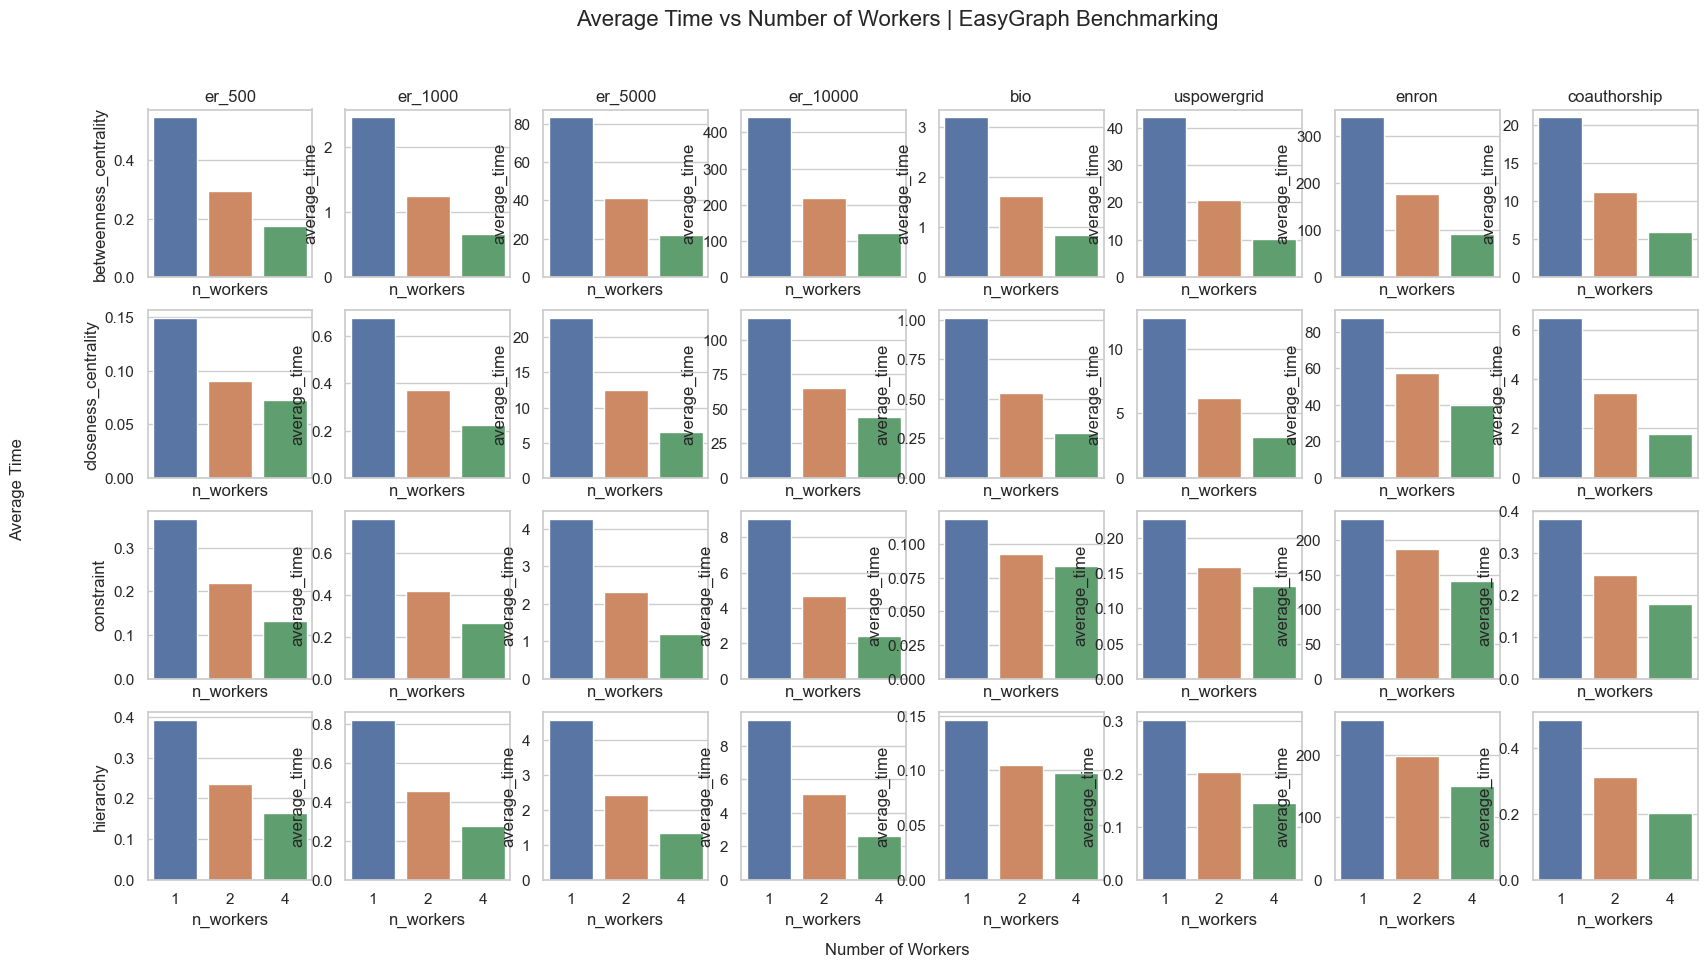

In [13]:
def plot_bars(dataset, method, df):
    data = df[(df['dataset'] == dataset) & (df['method'] == method)]
    sns.barplot(x='n_workers', y='average_time', data=data)

num_datasets = df['dataset'].nunique()
num_methods = df['method'].nunique()
fig, axes = plt.subplots(num_methods, num_datasets, figsize=(20, 10), sharex=True, )
datasets = df['dataset'].unique()
methods = df['method'].unique()

for i, method in enumerate(methods):
    for j, dataset in enumerate(datasets):
        plt.sca(axes[i, j])  # Set the current axes to be the one corresponding to the current dataset and method
        plot_bars(dataset, method, df)
        if i == 0:
            plt.title(dataset)
        if j == 0:
            plt.ylabel(method)


fig.text(0.5, 0.04, 'Number of Workers', ha='center', va='center', fontsize=12)
fig.text(0.06, 0.5, 'Average Time', ha='center', va='center', rotation='vertical', fontsize=12)

# set title
plt.suptitle('Average Time vs Number of Workers | EasyGraph Benchmarking', fontsize=16)
plt.show()
